In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

In [51]:
diff = pd.read_csv('/Users/faflik/Projects/MoleculeScreen/Data/results/diffdock/Diffdock_results.csv')
vina = pd.read_csv('/Users/faflik/Projects/MoleculeScreen/Data/results/repurposing/7RDY/updated_repurposing_result.csv')

In [52]:
diff.head()

,Index,PDB Code,SMILES Chemical Structure,Best,Mean,Run times,Min self distances
0,0,tmp-pdb-7RDY,NC1=NC=NC2=C1N=CN2[C@@H]1O[C@@H]2CO[P@](S)(=O)...,-1.257020,-2.463142,226.951520,1.323899
1,1,tmp-pdb-7RDY,[H][C@@]12CC[C@]3(C)[C@]([H])(CCC4=C5CC(C)(C)C...,-1.452247,-3.132486,170.946050,1.298984
2,2,tmp-pdb-7RDY,[H][C@@]1(CC[C@]2(O)[C@]3([H])CCC4=C[C@]([H])(...,-1.473806,-2.746019,193.545979,1.257796
3,3,tmp-pdb-7RDY,CC1(C)CCC2(CC1)N[C@H]([C@H](C1=C(F)C(Cl)=NC=C1...,-1.515139,-3.046909,201.739631,1.255977
4,4,tmp-pdb-7RDY,[H][C@@]12CC3=CC(OC4=CC=C(C[C@]5([H])N(C)CCC6=...,-1.330953,-3.106141,204.903096,1.347190


In [53]:
vina.head()

,proteinID,ligandID,mean,median,max,min,var,DATABASE_ID,DATABASE_NAME,SMILES,...,DRUGBANK_ID,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE,JCHEM_NEUTRAL_CHARGE,SECONDARY_ACCESSION_NUMBERS,INTERNATIONAL_BRANDS,SALTS
0,7RDY-no-extra,Mrv1909-10091921542D,-17.747059,-17.70,-17.7,-17.9,0.003897,DB15532,drugbank,[H][C@@]1(O[C@@H]2[C@@H](CO)O[C@@H](OC[C@H]3O[...,...,DB15532,experimental,Madecassoside,Asiaticoside A; Redermic,CareMe Madecassoside Cica Derma Repair Control...,NaN,n,NaN,NaN,NaN
1,7RDY-no-extra,Mrv0541-02231214492D,-15.847727,-15.85,-15.5,-16.1,0.065344,DB00615,drugbank,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,...,DB00615,approved; investigational,Rifabutin,"1,4-Dihydro-1-deoxy-1',4-didehydro-5'-(2-methy...",Mycobutin; Rifabutin; Talicia,0.454171,0,APRD00094,Ansatipin; Ansatipine; Ributin,NaN
2,7RDY-zinc,Mrv1909-08181923252D,-15.500000,-15.50,-15.5,-15.5,0.000000,DB01152,drugbank,CC(CC(C)C1OC(=O)CC(=O)CCCC(=O)CC(O)CC(O)CC(O)C...,...,DB01152,approved; withdrawn,Candicidin,Candicidin; Candicidina; Candicidine; Candicid...,NaN,NaN,n,APRD00843,Vanobid,NaN
3,7RDY-no-extra,Mrv0541-02231215192D,-14.802273,-14.70,-14.7,-15.0,0.013716,DB01201,drugbank,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,...,DB01201,approved; investigational,Rifapentine,3-(((4-Cyclopentyl-1-piperazinyl)imino)methyl)...,Priftin,0.287753,0,APRD01217,NaN,Rifapentine hydrochloride
4,7RDY-no-extra,Mrv0541-02231215202D,-14.772727,-14.75,-14.6,-14.9,0.013192,DB01220,drugbank,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,...,DB01220,approved; investigational,Rifaximin,Rifamycin L 105; Rifamycin L 105SV; Rifaxidin;...,Xifaxan; Zaxine,-1.007268,-1,APRD01218,Normix; Rifacol; Xifaxsan,NaN


In [54]:
def filter_dataframe(df_to_filter, df_reference, column_to_filter, reference_column):
    """
    Drops rows from df_to_filter whose values in column_to_filter are not found in reference_column of df_reference.

    Parameters:
    df_to_filter (pd.DataFrame): DataFrame to be filtered.
    df_reference (pd.DataFrame): DataFrame to use as reference for filtering.
    column_to_filter (str): Column name in df_to_filter to apply the filter on.
    reference_column (str): Column name in df_reference to compare against.

    Returns:
    pd.DataFrame: Filtered DataFrame.
    """
    # Identify values in the reference column
    reference_values = set(df_reference[reference_column])

    # Filter the DataFrame
    filtered_df = df_to_filter[df_to_filter[column_to_filter].isin(reference_values)]

    return filtered_df

In [55]:
vina = filter_dataframe(vina, diff, 'SMILES', 'SMILES Chemical Structure')

In [56]:
vina.count()

proteinID                                    55
ligandID                                     55
mean                                         55
median                                       55
max                                          55
min                                          55
var                                          55
DATABASE_ID                                  55
DATABASE_NAME                                55
SMILES                                       55
INCHI_IDENTIFIER                             55
INCHI_KEY                                    55
FORMULA                                      55
MOLECULAR_WEIGHT                             55
EXACT_MASS                                   55
JCHEM_ACCEPTOR_COUNT                         55
JCHEM_ATOM_COUNT                             55
JCHEM_AVERAGE_POLARIZABILITY                 55
JCHEM_BIOAVAILABILITY                        55
JCHEM_DONOR_COUNT                            55
JCHEM_FORMAL_CHARGE                     

In [57]:
diff['Diff_Rank_Best'] = diff['Best'].rank(method='first')
diff['Diff_Rank_Mean'] = diff['Mean'].rank(method='first')
vina['Vina_Rank'] = vina['mean'].rank(method='first')

In [58]:
merged = pd.merge(diff, vina, left_on='SMILES Chemical Structure', right_on='SMILES')

In [59]:
merged.count()

Index                                        55
PDB Code                                     55
SMILES Chemical Structure                    55
Best                                         55
Mean                                         55
Run times                                    55
Min self distances                           55
Diff_Rank_Best                               55
Diff_Rank_Mean                               55
proteinID                                    55
ligandID                                     55
mean                                         55
median                                       55
max                                          55
min                                          55
var                                          55
DATABASE_ID                                  55
DATABASE_NAME                                55
SMILES                                       55
INCHI_IDENTIFIER                             55
INCHI_KEY                               

In [60]:
merged['Ranking_Difference_vina/best'] = abs(merged['Diff_Rank_Best'] - merged['Vina_Rank'])
merged['Ranking_Difference_vina/mean'] = abs(merged['Diff_Rank_Mean'] - merged['Vina_Rank'])

In [61]:
def hist(merged_df, col, title='Ranking Difference'):
    # Histogram/Boxplot for Ranking Differences
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[col], bins=40, kde=True, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Ranking Differences')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()

/Users/faflik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


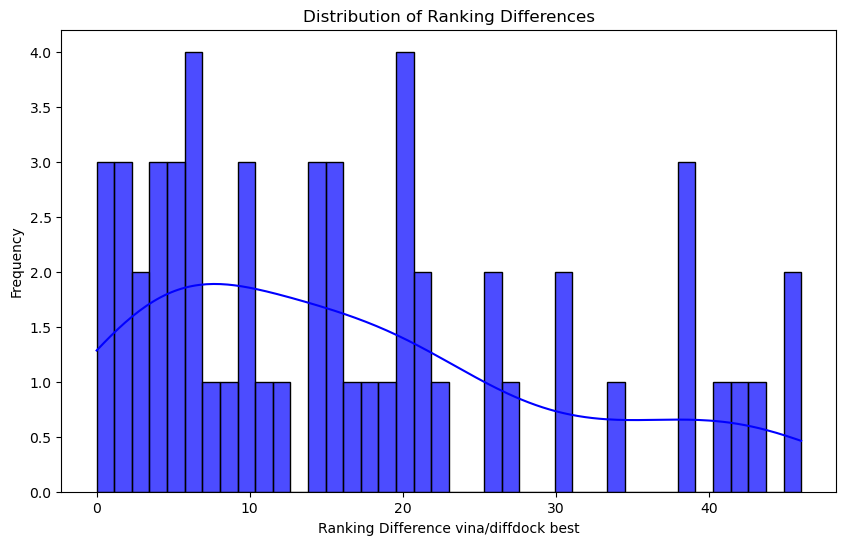

In [62]:
hist(merged, 'Ranking_Difference_vina/best', title='Ranking Difference vina/diffdock best')

/Users/faflik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


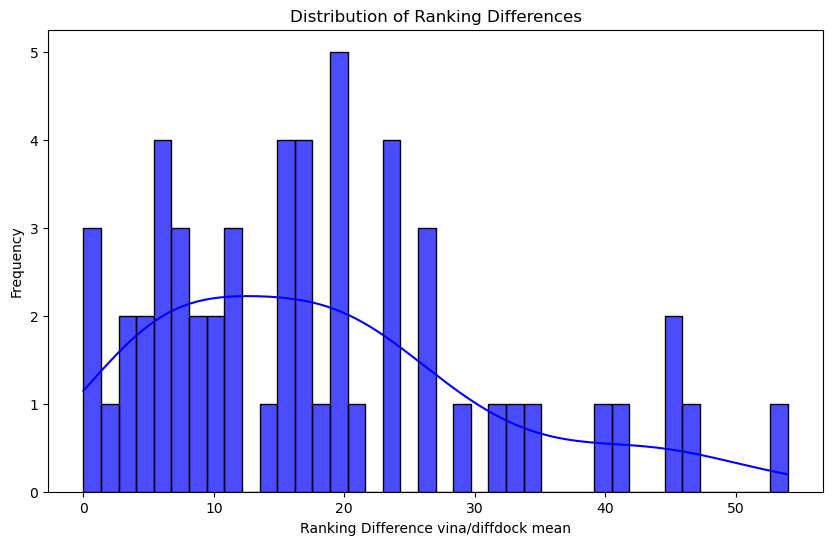

In [63]:
hist(merged, 'Ranking_Difference_vina/mean', title='Ranking Difference vina/diffdock mean')

In [64]:
merged['Ranking_Difference_vina/best'].describe()

count    55.000000
mean     16.872727
std      13.430279
min       0.000000
25%       5.500000
50%      14.000000
75%      24.000000
max      46.000000
Name: Ranking_Difference_vina/best, dtype: float64

In [65]:
merged['Ranking_Difference_vina/mean'].describe()

count    55.000000
mean     18.109091
std      12.908040
min       0.000000
25%       7.500000
50%      17.000000
75%      24.000000
max      54.000000
Name: Ranking_Difference_vina/mean, dtype: float64

In [70]:
def Scatter(merged_df, x, y='Vina_Rank'):
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=merged_df)
    plt.title('Comparison of Drug Docking Approaches')
    plt.xlabel('Diffdock Score (Approach 1)')
    plt.ylabel('Vina Score (Approach 2)')
    plt.show()

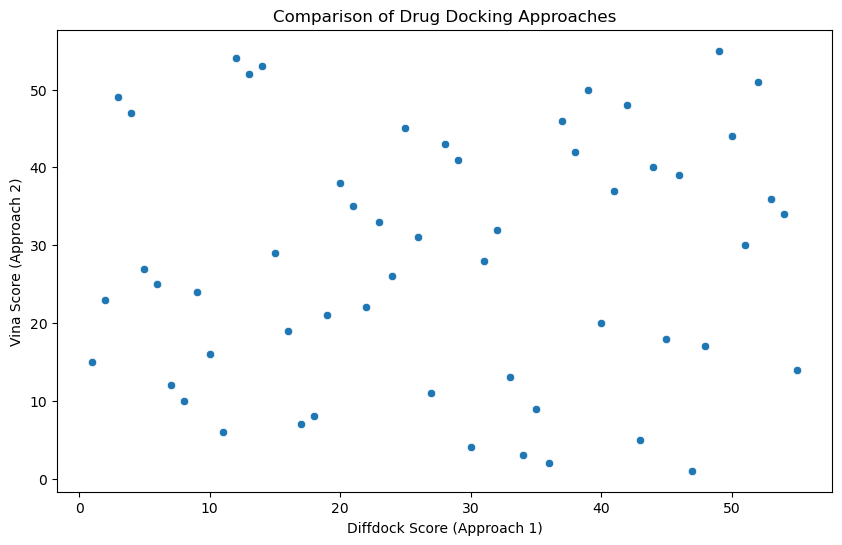

In [71]:
Scatter(merged, 'Diff_Rank_Best')

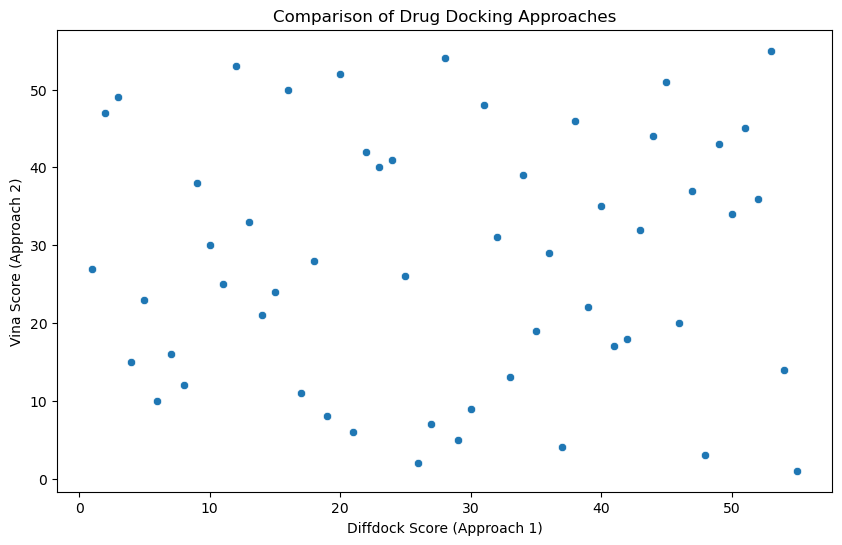

In [72]:
Scatter(merged, 'Diff_Rank_Mean')

In [74]:
def correlation(merged_df, col):
    # Calculate Spearman's rank correlation
    correlation, p_value = spearmanr(merged_df[col], merged_df['Vina_Rank'])
    
    print(f"Spearman's rank correlation coefficient: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")

# Interpret the results
# A correlation close to 1 indicates a strong positive relationship,
# close to -1 indicates a strong negative relationship,
# and around 0 indicates no relationship.

In [76]:
correlation(merged, 'Diff_Rank_Best')

Spearman's rank correlation coefficient: 0.084
P-value: 0.543


In [77]:
correlation(merged, 'Diff_Rank_Mean')

Spearman's rank correlation coefficient: 0.025
P-value: 0.858
